## LV_1. 신규 아이디 추천

카카오에 입사한 신입 개발자 네오는 "카카오계정개발팀"에 배치되어, 카카오 서비스에 가입하는 유저들의 아이디를 생성하는 업무를 담당하게 되었습니다. "네오"에게 주어진 첫 업무는 새로 가입하는 유저들이 카카오 아이디 규칙에 맞지 않는 아이디를 입력했을 때, 입력된 아이디와 유사하면서 규칙에 맞는 아이디를 추천해주는 프로그램을 개발하는 것입니다.
다음은 카카오 아이디의 규칙입니다.

- 아이디의 길이는 3자 이상 15자 이하여야 합니다.
- 아이디는 알파벳 소문자, 숫자, 빼기(-), 밑줄(_), 마침표(.) 문자만 사용할 수 있습니다.
- 단, 마침표(.)는 처음과 끝에 사용할 수 없으며 또한 연속으로 사용할 수 없습니다.

"네오"는 다음과 같이 7단계의 순차적인 처리 과정을 통해 신규 유저가 입력한 아이디가 카카오 아이디 규칙에 맞는 지 검사하고 규칙에 맞지 않은 경우 규칙에 맞는 새로운 아이디를 추천해 주려고 합니다.
신규 유저가 입력한 아이디가 new_id 라고 한다면,

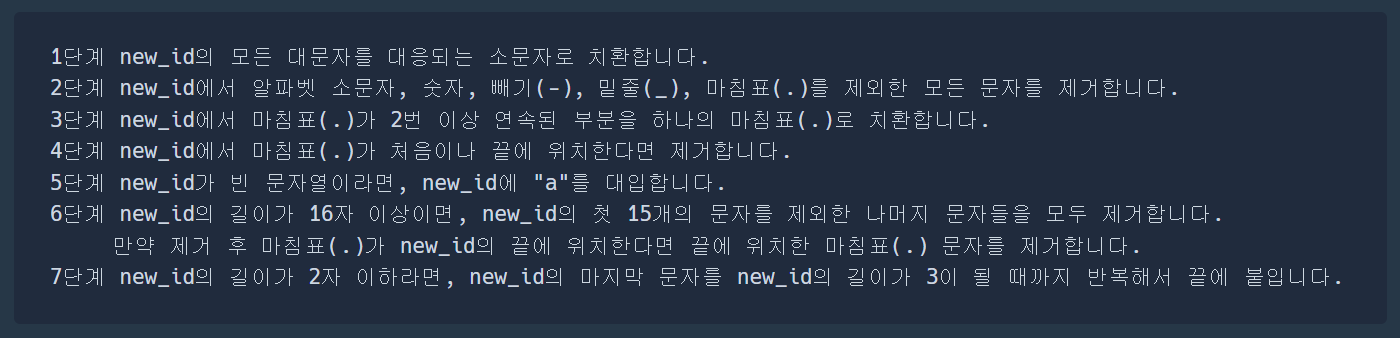


예를 들어, new_id 값이 "...!@BaT#*..y.abcdefghijklm" 라면, 위 7단계를 거치고 나면 new_id는 아래와 같이 변경됩니다.

1단계 대문자 'B'와 'T'가 소문자 'b'와 't'로 바뀌었습니다.
"...!@BaT#*..y.abcdefghijklm" → "...!@bat#*..y.abcdefghijklm"

2단계 '!', '@', '#', '*' 문자가 제거되었습니다.
"...!@bat#*..y.abcdefghijklm" → "...bat..y.abcdefghijklm"

3단계 '...'와 '..' 가 '.'로 바뀌었습니다.
"...bat..y.abcdefghijklm" → ".bat.y.abcdefghijklm"

4단계 아이디의 처음에 위치한 '.'가 제거되었습니다.
".bat.y.abcdefghijklm" → "bat.y.abcdefghijklm"

5단계 아이디가 빈 문자열이 아니므로 변화가 없습니다.
"bat.y.abcdefghijklm" → "bat.y.abcdefghijklm"

6단계 아이디의 길이가 16자 이상이므로, 처음 15자를 제외한 나머지 문자들이 제거되었습니다.
"bat.y.abcdefghijklm" → "bat.y.abcdefghi"

7단계 아이디의 길이가 2자 이하가 아니므로 변화가 없습니다.
"bat.y.abcdefghi" → "bat.y.abcdefghi"

따라서 신규 유저가 입력한 new_id가 "...!@BaT#*..y.abcdefghijklm"일 때, 네오의 프로그램이 추천하는 새로운 아이디는 "bat.y.abcdefghi" 입니다.


### 제한사항

- 신규 유저가 입력한 아이디를 나타내는 new_id가 매개변수로 주어질 때, "네오"가 설계한 7단계의 처리 과정을 거친 후의 추천 아이디를 return 하도록 solution 함수를 완성해 주세요.


- new_id는 길이 1 이상 1,000 이하인 문자열입니다.
- new_id는 알파벳 대문자, 알파벳 소문자, 숫자, 특수문자로 구성되어 있습니다.
- new_id에 나타날 수 있는 특수문자는 -_.~!@#$%^&*()=+[{]}:?,<>/ 로 한정됩니다.

### 입출력 예

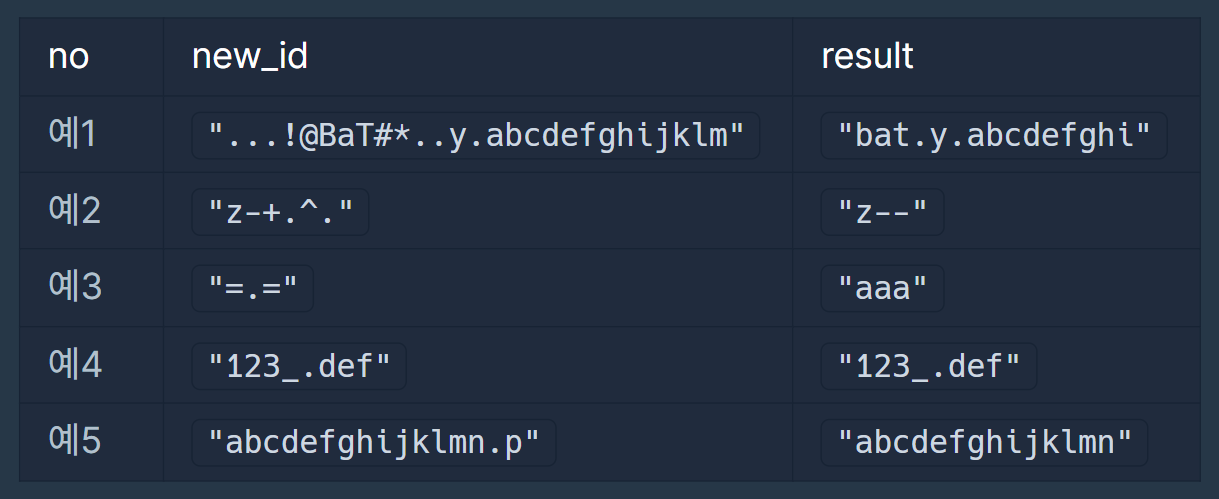

### 입출력 예 #1
- 문제의 예시와 같습니다.

### 입출력 예 #2
7단계를 거치는 동안 new_id가 변화하는 과정은 아래와 같습니다.

- 1단계 변화 없습니다.
- 2단계 "z-+.^." → "z-.."
- 3단계 "z-.." → "z-."
- 4단계 "z-." → "z-"
- 5단계 변화 없습니다.
- 6단계 변화 없습니다.
- 7단계 "z-" → "z--"

### 입출력 예 #3
7단계를 거치는 동안 new_id가 변화하는 과정은 아래와 같습니다.

- 1단계 변화 없습니다.
- 2단계 "=.=" → "."
- 3단계 변화 없습니다.
- 4단계 "." → "" (new_id가 빈 문자열이 되었습니다.)
- 5단계 "" → "a"
- 6단계 변화 없습니다.
- 7단계 "a" → "aaa"

### 입출력 예 #4
1단계에서 7단계까지 거치는 동안 new_id("123_.def")는 변하지 않습니다. 즉, new_id가 처음부터 카카오의 아이디 규칙에 맞습니다.

### 입출력 예 #5
- 1단계 변화 없습니다.
- 2단계 변화 없습니다.
- 3단계 변화 없습니다.
- 4단계 변화 없습니다.
- 5단계 변화 없습니다.
- 6단계 "abcdefghijklmn.p" → "abcdefghijklmn." → "abcdefghijklmn"
- 7단계 변화 없습니다.

### 내 풀이

In [17]:
new_id = "...!@BaT#*..y.abcdefghijklm"

import re

def solution(new_id):
    # 소문자로 변환
    new_id = new_id.lower()
    
    # 알파벳 소문자, 숫자, 빼기(-), 밑줄(_), 마침표(.)를 제외한 문자 제거
    new_id = re.sub("[^a-z0-9-_.]", "", new_id)
    
    # 연속된 마침표(.) 하나로 치환
    new_id = re.sub("\.+", ".", new_id)
    
    # 마침표(.)가 처음이나 끝에 위치한다면 제거
    new_id = re.sub("^\.|\.$", "", new_id)
    
    # 빈 문자열이라면 "a"를 대입
    if new_id == "":
        new_id = "a"
    
    # 길이가 16자 이상이면 처음부터 15자까지만 남기고 나머지 제거
    if len(new_id) >= 16:
        new_id = new_id[0:15]
        # 마침표(.)가 끝에 위치한다면 제거
        new_id = re.sub("^\.|\.$", "", new_id)
    
    # 길이가 2자 이하라면 마지막 문자를 길이가 3이 될 때까지 반복
    while len(new_id) <= 2:
        new_id += new_id[-1]
    
    return new_id

solution(new_id)


'bat.y.abcdefghi'

### 다른 사람 풀이

In [17]:
new_id = "...!@BaT#*..y.abcdefghijklm"

import re

def solution(new_id):
    st = new_id
    st = st.lower()
    st = re.sub('[^a-z0-9\-_.]', '', st)
    st = re.sub('\.+', '.', st)
    st = re.sub('^[.]|[.]$', '', st)
    st = 'a' if len(st) == 0 else st[:15]
    st = re.sub('^[.]|[.]$', '', st)
    st = st if len(st) > 2 else st + "".join([st[-1] for i in range(3-len(st))])
    return st

solution(new_id)

'bat.y.abcdefghi'